In [2]:
import json
json_data = open('/home/mattiapdo/Desktop/ADM - Algorithmic Methods/Homework_3/reduced_dblp.json').read()

In [3]:
data = json.loads(json_data)

    data  
 is a list of dictionaries... let's see the first item

In [78]:
data[0]

{'authors': [{'author': 'h&eacute;lio marcos paz de almeida',
   'author_id': 255206},
  {'author': 'dorgival olavo guedes neto', 'author_id': 255207},
  {'author': 'wagner meira jr.', 'author_id': 16585},
  {'author': 'mohammed j. zaki', 'author_id': 255208}],
 'id_conference': 'conf/pkdd/2011-1',
 'id_conference_int': 3052,
 'id_publication': 'conf/pkdd/almeidanmz11',
 'id_publication_int': 161535,
 'title': 'is there a best quality metric for graph clusters?'}

We want to create a graph of all the authors... so we can scroll the list and, for each element of the list, check whether each author is in a dictionary 'of all the authors'


If NO
- add the author to the dictionary, and it's corresponding value: the id of the current publication
- create a new vertex in the graph, named as the id of the author

If YES
- insert the current publication id to the author in the dictionary

Before moving to next item of the list (to another publication), let's add a link between the authors that collaborated for that work (if they are not linked yet)

In [5]:
import networkx as nx
import matplotlib as plt

In [79]:
def nodes_connected(G, u, v):
    #this function returns 
    # True if the nodes are neighbours
    # False if the nodes are not neighbours
    return u in G.neighbors(v) and v in G.neighbors(u)

In [7]:
#Let's initialize a new graph (name is autoexplicative)
Authors = nx.Graph()
Authors.name = 'Authors Graph'

#let's build the inverted dictionary for the authors
inverted_dictionary = {}
for dictionary in data:
    # add authors to the graph if they are not in and
    # build the inverted dictionary
    for author in dictionary['authors']:
        if author['author_id'] not in inverted_dictionary:
            Authors.add_node(author['author_id'], name = author['author'] )
            inverted_dictionary[author['author_id']] = {'name': author['author'], 'publications':[(dictionary['id_publication_int'],dictionary['title'])]}
        else:
            inverted_dictionary[author['author_id']]['publications'].append((dictionary['id_publication_int'],dictionary['title']))
    
    # add edges between authors that appear as contributors in the publication
    # if they are not still connected
    for author1 in dictionary['authors']:
        for author2 in dictionary['authors']:
            if not nodes_connected(Authors, author1['author_id'], author2['author_id']) and author1!=author2:
                Authors.add_edge(author1['author_id'],author2['author_id'])

In [84]:
inverted_dictionary[9308]

{'name': 'xindong wu',
 'publications': [(161687,
   'active learning of model parameters for influence maximization.'),
  (383148, 'towards mining trapezoidal data streams.'),
  (383188,
   'learning label specific features for multi-label classification.')]}

Now,
    
    for each couple of authors:
        if they are linked:
            evaluate the Jaccard distance
            set it as weigth for the edge
        

In [85]:
def jaccard_dist (id_1, id_2, inv_dict):
    #this function returns the Jaccard distance between two authors
    publ_1 = set([inverted_dictionary[id_1]['publications'][i][0] for i in range(len(inverted_dictionary[id_1]['publications']))])
    publ_2 = set([inverted_dictionary[id_2]['publications'][i][0] for i in range(len(inverted_dictionary[id_2]['publications']))])
    union  = publ_1.union(publ_2)
    intersection = publ_1.intersection(publ_2)
    return 1-len(intersection)/len(union)

In [9]:
#let's add weigths to the graphs
for author1 in inverted_dictionary:
    for author2 in Authors.neighbors(author1):
        Authors[author1][author2]['weight'] = jaccard_dist(author1, author2, inverted_dictionary)

# ho qualche problema..

In [86]:
nx.info(Authors) #edges adriano : 16689

'Name: Contributors to 3345 conference\nType: Graph\nNumber of nodes: 7771\nNumber of edges: 16488\nAverage degree:   4.2435'

## Given a conference in input, return the subgraph induced by the set of authors who published at the input conference at least once

given the list of nodes of the subgraph 
              
    nbunch
    
we can make the induced subgraph as follows:

    Graph.subgraph(nbunch)
    
Return the subgraph induced on nodes in nbunch. The induced subgraph of the graph conOtains the nodes in nbunch and the edges between those nodes.. For **example**

    >>> G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
    >>> G.add_path([0,1,2,3])
    >>> H = G.subgraph([0,1,2])
    >>> H.edges()
    [(0, 1), (1, 2)]

Let's create an inverted dictionary for the publications

In [89]:
pubDict = {}
#in questo dizionario la chiave è la publication id
#i valori sono gli autori
for i in range(len(data)):
    for a in data[i]['authors']:
        for j in range(len(data[i]['authors'])):
            key = data[i]['id_conference_int']
            if key in pubDict.keys():
                if data[i]['authors'][j]['author_id'] not in pubDict[key]:
                    pubDict[key].append(data[i]['authors'][j]['author_id'])
            else:
                pubDict[key] = [data[i]['authors'][j]['author_id']]

In [92]:
#inserire in input la pubblicazione
confInt = int(input())
#nbunch will be the list of author's id that contribuited to tha
nbunch = pubDict[confInt]
#try for example 3345

3345


### Subgraph induced

In [95]:
Sottografo = Authors.subgraph(nbunch)
Sottografo.name = 'Contributors to '+ str(confInt) + ' conference'
nx.info(Sottografo)

'Name: Contributors to 3345 conference\nType: Graph\nNumber of nodes: 622\nNumber of edges: 1659\nAverage degree:   5.3344'

## Do statistics and plot them

Take some centrality measures

In [43]:
degree_centrality = nx.degree_centrality(Sottografo)
closeness_centrality = nx.closeness_centrality(Sottografo)
betweeness_centrality = nx.betweenness_centrality(Sottografo)

Get the values of such dictionaries as lists

In [68]:
degrees =list(degree_centrality.values())
centralities = list(closeness_centrality.values())
betweennesses = list(betweeness_centrality.values())

Plot the histogram of centralities measures

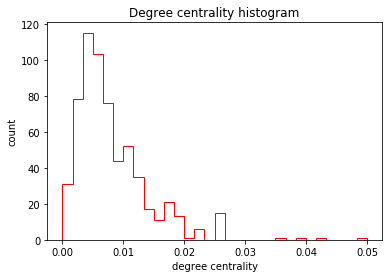

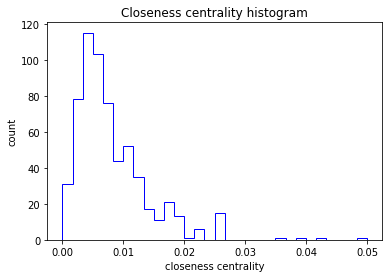

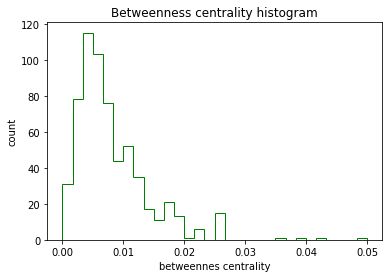

In [94]:
plt.clf()
plt.figure()
plt.hist(degrees, bins=30, color='red', histtype='step')
plt.title('Degree centrality histogram')
plt.xlabel('degree centrality')
plt.ylabel('count')
plt.xlim()
plt.show()

plt.clf()
plt.figure()
plt.hist(degrees, bins=30, color='blue', histtype='step')
plt.title('Closeness centrality histogram')
plt.xlabel('closeness centrality')
plt.ylabel('count')
plt.show()

plt.clf()
plt.figure()
plt.hist(degrees, bins=30, color='green', histtype='step')
plt.title('Betweenness centrality histogram')
plt.xlabel('betweennes centrality')
plt.ylabel('count')
plt.show()

## given in input an author and an integer d, get the subgraph induced by the nodes that have hop distance (i.e., number of edges) at most equal to d with the input author. Then, visualize the graph.